In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const

In [2]:
#Aufgabe 1
def f(x):
    return (x**3+1/3)-(x**3-1/3)
def g(x):
    return ((3+x**3/3)-(3-x**3/3))/x**3 #Hier sieht man schon das x=0 ausgeschlossen ist.

Für ganzzahlige x-Werte im Bereich von  -41285.0  bis  41285.0 ist der Fehler der Formel f(x) kleiner als 1 Prozent
Für Zahlen x <  -165141.0 und x >  165141.0  ist f(x)=0


Text(0, 0.5, 'Fehler in $\\%$')

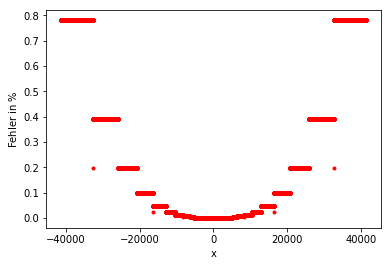

In [3]:
#Überprüfung des ganzzahligen Bereichs zur Bestimmung der Grenze
x_value = np.linspace(-175000,175000,350001)
for i in x_value:
    if np.abs(f(i))==0:
        ns = i
    if i<0:
        if np.abs(f(i)*3/2-1)>0.01:
            x_min=i+1
    if i>0:
        if np.abs(f(i)*3/2-1)>0.01:
            x_max=i-1
            print("Für ganzzahlige x-Werte im Bereich von ", x_min," bis ", x_max, "ist der Fehler der Formel f(x) kleiner als 1 Prozent")
            print("Für Zahlen x < ", ns, "und x > ", -ns, " ist f(x)=0")
            break
        elif i==175000:
            print("175000 ist keine Grenze")
xplot=np.linspace(int(x_min),int(x_max),int(x_max)-int(x_min)+1)
plt.plot(xplot, np.abs(f(xplot)*3/2-1)*100,'r.')
plt.xlabel('x')
plt.ylabel(r'Fehler in $\%$')

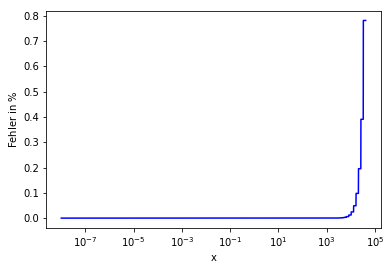

In [4]:
# Logarithmische Überprüfung des (positiven) Bereichs
xplotlog=np.logspace(-8,4.615793,1000000)
#print(np.abs(f(xplotlog)*3/2-1)*100)
plt.plot(xplotlog, np.abs(f(xplotlog)*3/2-1)*100,'b-')
plt.xlabel('x')
plt.ylabel(r'Fehler in $\%$')
plt.xscale('log')

In [5]:
#Überprüfung von g(x)
x_value_g=np.logspace(-6,1,100000)
for i in x_value_g:
    if np.abs(g(i))==0:
        ns_g = i
    if np.abs(g(i)*3/2-1)>0.01:
            x_min_g=i
print("Für x-Werte", x_min_g, "< x ist der Fehler der Formel g(x) kleiner als 1 Prozent")
print("Für Zahlen x <", ns_g, "ist g(x)=0")
            

Für x-Werte 4.0126939241462344e-05 < x ist der Fehler der Formel g(x) kleiner als 1 Prozent
Für Zahlen x < 8.732918589921798e-06 ist g(x)=0


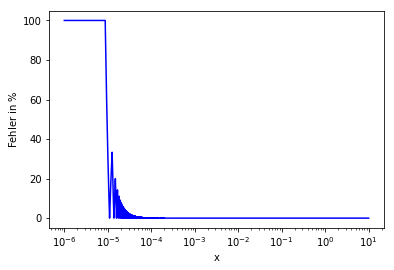

In [6]:
plt.plot(x_value_g, np.abs(g(x_value_g)*3/2-1)*100,'b-')
plt.xlabel('x')
plt.ylabel(r'Fehler in $\%$')
plt.xscale('log')

In [7]:
#Aufgabe 2
alpha=const.alpha
m_e=const.physical_constants["electron mass energy equivalent in MeV"][0]
E_e=50000 #Alle Energien in MeV
gamma=E_e/m_e
beta=np.sqrt(1-1/gamma**2)
s=(2*E_e)**2 
def dsdO(theta):
    return alpha**2/s*(2+np.sin(theta)**2)/(1-beta**2*np.cos(theta)**2)
def dsdO_num(theta):
    return alpha**2/s*(2+np.sin(theta)**2)/(1/gamma**2*np.cos(theta)**2+np.sin(theta)**2)

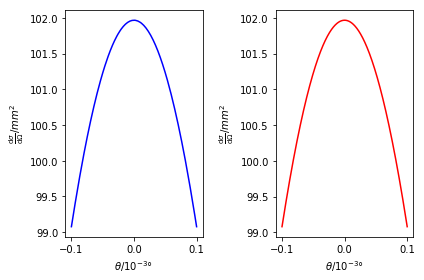

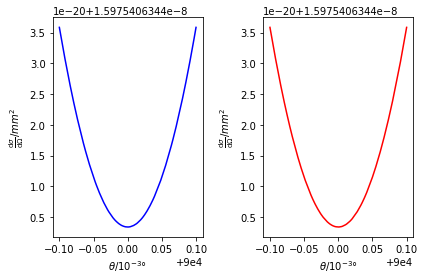

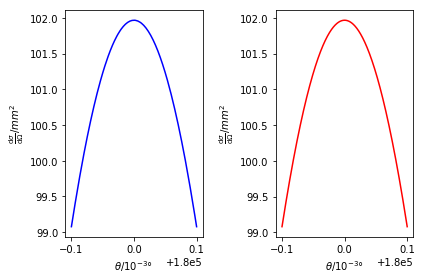

In [9]:
pl_0=np.linspace(-np.pi/1800000,np.pi/1800000,1000) #Im Bereich um theta=0°
pl_pi_2=np.linspace(np.pi/2-np.pi/1800000,np.pi/2+np.pi/1800000,1000) #Im Bereich um theta=90°
pl_pi=np.linspace(np.pi-np.pi/1800000,np.pi+np.pi/1800000,1000) #Im Bereich um theta=180°

# @Jasmin/Yascha Es wäre schön, wenn ihr hier versucht die Achsenbeschriftung schöner zu machen mit LaTeX (\si), das will bei mir nicht
f1=plt.figure()
plt.subplot(121)
plt.plot(pl_0/2/np.pi*360000,dsdO(pl_0)*10**6,'b-')
plt.xlabel(r'$\theta/10^{-3}°$')
plt.ylabel(r'$\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}/mm^2$')
plt.subplot(122)
plt.plot(pl_0/2/np.pi*360000,dsdO_num(pl_0)*10**6,'r-')
plt.xlabel(r'$\theta/10^{-3}°$')
plt.ylabel(r'$\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}/mm^2$')
plt.tight_layout()
f1.savefig('plot1.pdf')

f2=plt.figure()
plt.subplot(121)
plt.plot(pl_pi_2/2/np.pi*360000,dsdO(pl_pi_2)*10**6,'b-')
plt.xlabel(r'$\theta/10^{-3}°$')
plt.ylabel(r'$\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}/mm^2$')
plt.subplot(122)
plt.plot(pl_pi_2/2/np.pi*360000,dsdO_num(pl_pi_2)*10**6,'r-')
plt.xlabel(r'$\theta/10^{-3}°$')
plt.ylabel(r'$\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}/mm^2$')
plt.tight_layout()
f2.savefig('plot2.pdf')

f3=plt.figure()
plt.subplot(121)
plt.plot(pl_pi/2/np.pi*360000,dsdO(pl_pi)*10**6,'b-')
plt.xlabel(r'$\theta/10^{-3}°$')
plt.ylabel(r'$\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}/mm^2$')
plt.subplot(122)
plt.plot(pl_pi/2/np.pi*360000,dsdO_num(pl_pi)*10**6,'r-')
plt.xlabel(r'$\theta/10^{-3}°$')
plt.ylabel(r'$\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}/mm^2$')
plt.tight_layout()
f3.savefig('plot3.pdf')

In [10]:
#Konditionszahl K, x bezeichnet hier den Winkel theta
def K(x):
    return x * np.abs((2*np.sin(x)*np.cos(x)*(1-3*beta**2))/((2+np.sin(x)**2)(1-beta**2*np.cos(x)**2)))
theta_plot=np.linspace(0,np.pi,1000)
plt.plot(theta_plot/2/np.pi*360,K(theta_plot),'b-')
plt.xlabel(r'$\theta/°$')
plt.ylabel(r'$K(\theta)$')

TypeError: 'numpy.ndarray' object is not callable